# Conflict Event interactive visualizations with Altair & Text Analysis Visualization 


**Author:** Abdel An'lah TIDJANI

**Date:** December 31,2021

## Notebook Configuration

In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from glob import glob
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import altair as alt
import folium
import geopandas as gpd

from Wrangledata import wrangle #Our function
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
# Number of rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

### Load data

In [3]:
# Load data

ghana = wrangle(glob('data/*Ghana.csv')[0]) #Ghana Data

kenya = wrangle(glob('data/*Kenya.csv')[0]) #Kenya Data

In [4]:
print(ghana.shape)
ghana.head()

(1276, 18)


,event_date,year,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,admin1,admin2,location,latitude,longitude,source,source_scale,notes,fatalities
0,2021-11-04,2021,Protests,Peaceful protest,Protesters (Ghana),protesters,NaN,no victicme,sole protester action,Eastern,Akwapem North,Larteh,5.9395,-0.0689,GNA (Ghana),National,"On 4 November 2021, members of the Presbyteria...",0
1,2021-11-03,2021,Riots,Violent demonstration,Rioters (Ghana),rioters,Police Forces of Ghana (2017-),state forces,military versus rioters,Central,Assin North,Assin Bereku,5.8678,-1.3389,Citi News; Ghana Web,National,"On 3 November 2021, workers of the Shimizu Dai...",0
2,2021-11-03,2021,Protests,Peaceful protest,Protesters (Ghana),protesters,NaN,no victicme,sole protester action,Ashanti,Amansie West,Manso Atwere,6.4574,-1.8575,Citi News,National,"On 3 November 2021, residents demonstrated in ...",0
3,2021-11-01,2021,Riots,Mob violence,Rioters (Ghana),rioters,Police Forces of Ghana (2017-),state forces,military versus rioters,Northern,Tamale,Tamale,9.4008,-0.8393,GNA (Ghana),National,"On 1 November 2021, residents of Kukuo suburb ...",0
4,2021-10-30,2021,Battles,Armed clash,Nadu Warriors Communal Militia (Ghana),communal militias,Police Forces of Ghana (2017-),state forces,military versus communal militia,Eastern,Lower Manya,Krobo,6.1299,0.0012,Ghana Web; Chronicle (Ghana),National,"On 30 October 2021, members of the Nadu Warrio...",0


In [5]:
print(kenya.shape)
kenya.head()

(7701, 18)


,event_date,year,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,admin1,admin2,location,latitude,longitude,source,source_scale,notes,fatalities
0,2021-11-17,2021,Protests,Peaceful protest,Protesters (Kenya),protesters,NaN,no victicme,sole protester action,Tana River,Bura,Madogo,-0.4711,39.5952,The Star (Kenya),National,"On 17 November 2021, members from Munyo Yaya c...",0
1,2021-11-16,2021,Protests,Peaceful protest,Protesters (Kenya),protesters,NaN,no victicme,sole protester action,Lamu,Lamu West,Lamu,-2.2717,40.9020,The Star (Kenya),National,"On 16 November 2021, local residents marched t...",0
2,2021-11-16,2021,Protests,Peaceful protest,Protesters (Kenya),protesters,NaN,no victicme,sole protester action,Garissa,Garissa,Garissa,-0.4536,39.6461,The Star (Kenya),National,"On 16 November 2021, more than 200 cereal trad...",0
3,2021-11-10,2021,Riots,Mob violence,Rioters (Kenya),rioters,Civilians (Kenya),civilians,rioters versus civilians,Nakuru,Nakuru North,Nakuru,-0.2441,36.1420,Daily Nation (Kenya); Kenya Standard,National,"On 10 November 2021, local residents burnt and...",2
4,2021-11-10,2021,Battles,Armed clash,Pokot Ethnic Militia (Kenya),communal militias,Police Forces of Kenya (2013-) General Service...,state forces,military versus communal militia,Laikipia,Laikipia West,Ol-moran,0.5368,36.4880,Daily Nation (Kenya); Kenya Standard,National,"On 10 November 2021, armed pokot militia attac...",4


### Load Shapefile data

In [ ]:
k_df = gpd.read_file('data/Kenya_county.shp')

In [ ]:
g_df = gpd.read_file('data/Ghana_county.shp')

In [ ]:
g_df

In [ ]:
k_df

### Background plot

In [ ]:
backgroundK = alt.Chart(k_df) \
                .mark_geoshape(
                    fill='lightgray',
                    stroke='black',
                    strokeWidth=0.2) \
                .project() \
                .properties(
                    width=500,
                    height=500)

backgroundK

In [ ]:
backgroundG = alt.Chart(g_df) \
                .mark_geoshape(
                    fill='lightgray',
                    stroke='black',
                    strokeWidth=0.2) \
                .project() \
                .properties(
                    width=500,
                    height=500)

backgroundG

## Visualisation of conflict



In [ ]:
points = alt.Chart(kenya) \
            .mark_circle() \
            .encode(
                longitude='longitude',
                latitude='latitude',
                color=alt.Color("event_type",title="Event type"),
                size=alt.Size('fatalities', scale=alt.Scale(domain=(-10, 100)),title="Fatalities"),
                tooltip=['location','event_type','sub_event_type',
                         'event_date','fatalities','interaction:N', 'latitude', 'longitude'])\
            .properties(
                title='Map of incidences conflict event in Kenya')

backgroundK + points

In [ ]:
points = alt.Chart(ghana) \
            .mark_circle() \
            .encode(
                longitude='longitude',
                latitude='latitude',
                color=alt.Color("event_type",title="Event type"),
                size=alt.Size('fatalities', scale=alt.Scale(domain=(-10, 100)),title="Fatalities"),
                tooltip=['location','event_type','sub_event_type',
                         'event_date','fatalities','interaction:N', 'latitude', 'longitude'])\
            .properties(
                title='Map of incidences conflict event in Ghana')

backgroundG + points

### Adding an interactive slider

In [ ]:
slider = alt.binding_range(min=1997, max=2021, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2010})
points = alt.Chart(kenya) \
            .mark_circle() \
            .encode(
                longitude='longitude',
                latitude='latitude',
                color=alt.Color("event_type",title="Event type"),
                size=alt.Size('fatalities', scale=alt.Scale(domain=(-10, 100)),title="fatalities"),
                tooltip=['location','event_type','sub_event_type',
                         'event_date','fatalities','interaction:N', 'latitude', 'longitude'])\
            .properties(
                title='Map of incidences conflict event in Kenya over the years')\
            .add_selection(select_year)\
            .transform_filter(select_year)

backgroundK + points

In [ ]:
slider = alt.binding_range(min=1997, max=2021, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2010})
points = alt.Chart(ghana) \
            .mark_circle() \
            .encode(
                longitude='longitude',
                latitude='latitude',
                color=alt.Color("event_type",title="Event type"),
                size=alt.Size('fatalities', scale=alt.Scale(domain=(-10, 100)),title="fatalities"),
                tooltip=['location','event_type','sub_event_type',
                         'event_date','fatalities','interaction:N', 'latitude', 'longitude'])\
            .properties(
                title='Map of incidences conflict event in Ghana over the years')\
            .add_selection(select_year)\
            .transform_filter(select_year)

backgroundG + points

### Number of Event in each Counties

In [ ]:
# Number of event
points = alt.Chart(kenya).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    fatalities='sum(fatalities)',
    event_count='count()',
    groupby=['admin1','event_type']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('event_count:Q', title='Number of Event',scale=alt.Scale(domain=(1, 200))),
    color=alt.Color("event_type",title="Event type"),
    tooltip=['admin1:N','event_count:Q','fatalities:Q','event_type:N']
).properties(
    title='Map of incidences conflict event in Kenya'
)

backgroundK + points

In [ ]:
# Number of event
points = alt.Chart(ghana).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    fatalities='sum(fatalities)',
    event_count='count()',
    groupby=['admin1','event_type']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('event_count:Q', title='Number of Event',scale=alt.Scale(domain=(1, 100))),
    color=alt.Color("event_type",title="Event type"),
    tooltip=['admin1:N','event_count:Q','fatalities:Q','event_type:N']
).properties(
    title='Map of incidences conflict event in Ghana'
)

backgroundG + points

In [ ]:
set(list(g_df.ADM1_EN)).difference(set(ghana.admin1.value_counts().index))

In [ ]:
set(list(k_df.COUNTY)).difference(set(kenya.admin1.value_counts().index))

In [ ]:


g_df["state"]=g_df["ADM1_EN"].replace(['Northern East'],['North East'])
    
k_df["state"]=k_df["COUNTY"].replace(['Keiyo-Marakwet', "Murang'a", 'Tharaka'],['Elgeyo Marakwet','Muranga','Tharaka-Nithi'])

In [ ]:
set(list(g_df.state)).difference(set(ghana.admin1.value_counts().index))

In [ ]:
set(list(k_df.state)).difference(set(kenya.admin1.value_counts().index))

## Keywords distribution by event_type

Let's present here few useful techniques for data visualization:

>Worldclouds for text fields;

>Countplot for category-type features.

In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,pos_tag
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud


In [12]:
# define cleaning function 

# Remove extra space, word segmentation, part-of-speech tagging
def tokenize(sentence):
    sentence = re.sub(r'\s+', ' ', sentence)
    token_words = word_tokenize(sentence)
    token_words = pos_tag(token_words)   
    return token_words

# Normalize the word form
def stem(token_words):
    wordnet_lematizer = WordNetLemmatizer()
    words_lematizer = []
    for word, tag in token_words:
        if tag.startswith('NN'):
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='n')  # n-noun
        elif tag.startswith('VB'): 
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='v')   # v-verb
        elif tag.startswith('JJ'): 
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='a')   # adjective
        elif tag.startswith('R'): 
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='r')   # r-pronoun
        else: 
            word_lematizer =  wordnet_lematizer.lemmatize(word)
        words_lematizer.append(word_lematizer)
    return words_lematizer

# Remove stopwords 
def delete_stopwords(token_words):
    cleaned_words = [word for word in token_words if word not in stopwords.words('english')]
    return cleaned_words

# Determine whether the string is a number
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

# Remove Special words and numbers
def delete_characters(token_words):
    words_list = [word for word in token_words if word not in string.punctuation and not is_number(word)]
    return words_list



# Combine the above steps and perform text preprocessing
def pre_process(text):
    token_words = tokenize(text)
    token_words = stem(token_words)    
    token_words = delete_stopwords(token_words)
    token_words = delete_characters(token_words)    
    cleaned_text=" ".join(token_words)
    return cleaned_text

#### Kenya

In [8]:
# apply clean
kenya["notes_clean"]=kenya["notes"].map(lambda x: pre_process(str(x)))
kenya[['event_type',"notes","notes_clean"]].head()


,event_type,notes,notes_clean
0,Protests,"On 17 November 2021, members from Munyo Yaya c...",On November member Munyo Yaya community protes...
1,Protests,"On 16 November 2021, local residents marched t...",On November local resident march county commis...
2,Protests,"On 16 November 2021, more than 200 cereal trad...",On November cereal trader include woman trader...
3,Riots,"On 10 November 2021, local residents burnt and...",On November local resident burnt kill two peop...
4,Battles,"On 10 November 2021, armed pokot militia attac...",On November arm pokot militia attack General S...


In [9]:
event_type_notes=kenya.groupby("event_type")["notes_clean"].apply(list).to_dict()
print(event_type_notes.keys())

dict_keys(['Battles', 'Explosions/Remote violence', 'Protests', 'Riots', 'Strategic developments', 'Violence against civilians'])


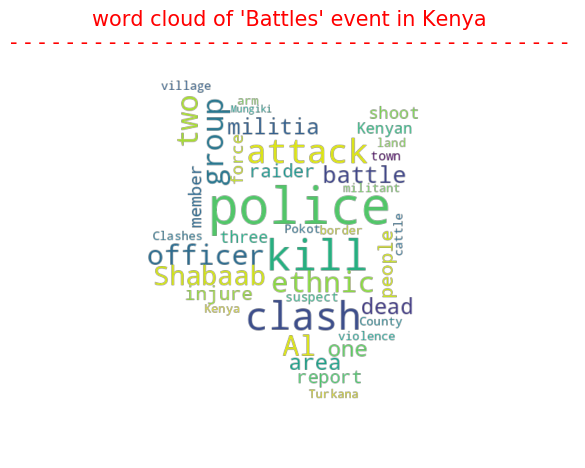

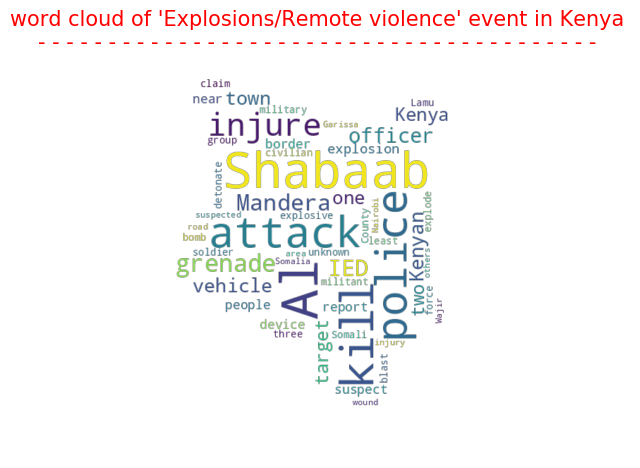

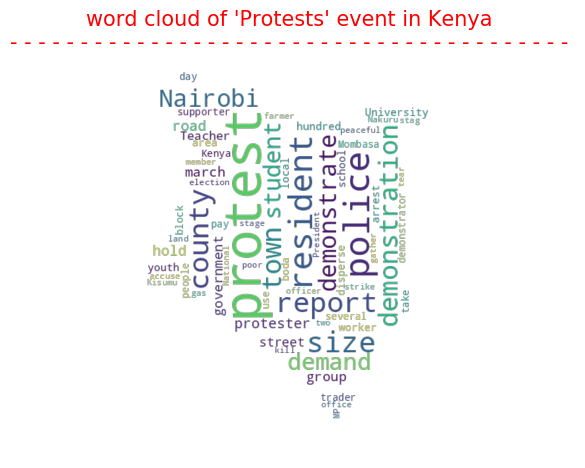

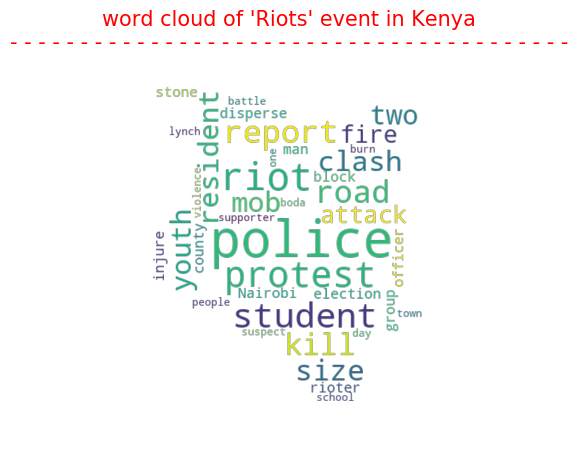

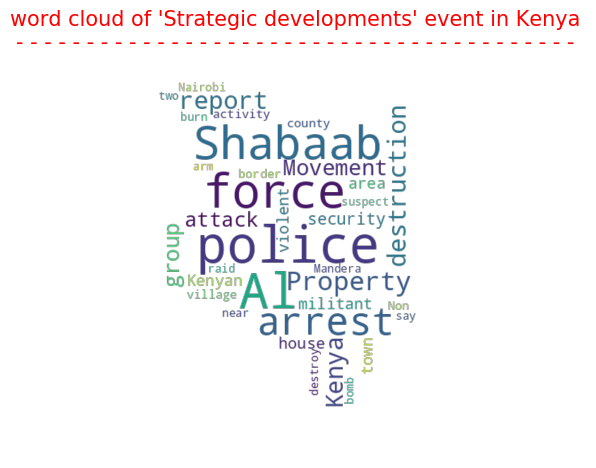

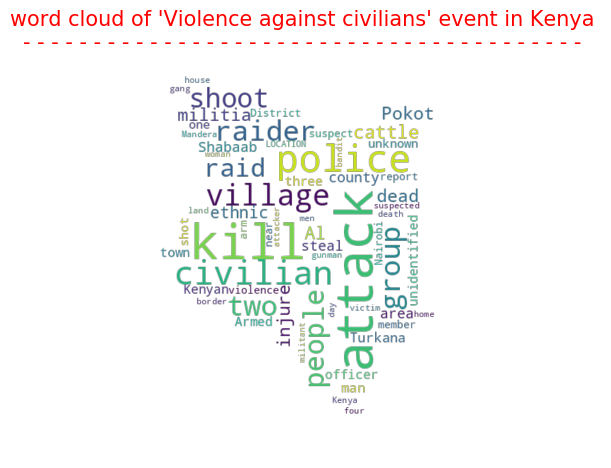

In [13]:
from PIL import Image
mask=np.array(Image.open("data/Kenya_map.png"))

for k in event_type_notes.keys():
    
    text=" ".join(event_type_notes[k])

    wc = WordCloud(width=900, height=500, mask=mask,
                   mode='RGBA', background_color=None,
                   min_font_size=12,max_font_size=72,
                   collocations=False,prefer_horizontal=0.8,
                   max_words=100).generate(text)

    # show wordcloud img
    plt.figure(figsize=(9,5),dpi=100)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("word cloud of '{}' event in Kenya \n{}".format(k,'- '*40),fontsize=15,color='red')
    plt.show()
    print()

#### Ghana

In [14]:
# apply clean
ghana["notes_clean"]=ghana["notes"].map(lambda x: pre_process(str(x)))
ghana[['event_type',"notes","notes_clean"]].head()


,event_type,notes,notes_clean
0,Protests,"On 4 November 2021, members of the Presbyteria...",On November member Presbyterian church Muslims...
1,Riots,"On 3 November 2021, workers of the Shimizu Dai...",On November worker Shimizu Dai-Nippon JV road ...
2,Protests,"On 3 November 2021, residents demonstrated in ...",On November resident demonstrate Manso Atwere ...
3,Riots,"On 1 November 2021, residents of Kukuo suburb ...",On November resident Kukuo suburb Tamale town ...
4,Battles,"On 30 October 2021, members of the Nadu Warrio...",On October member Nadu Warriors militia disrup...


In [15]:
event_type_notes=ghana.groupby("event_type")["notes_clean"].apply(list).to_dict()
print(event_type_notes.keys())

dict_keys(['Battles', 'Protests', 'Riots', 'Strategic developments', 'Violence against civilians'])


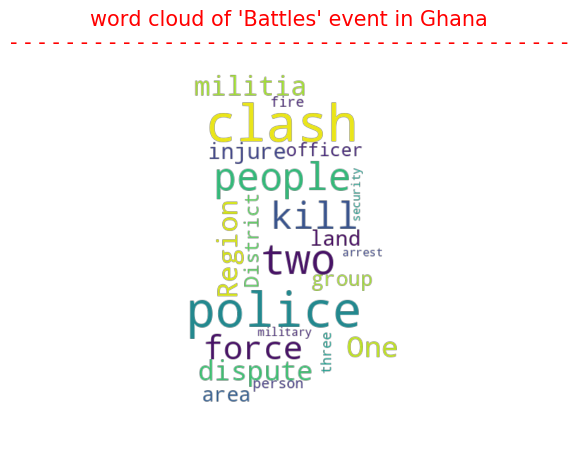

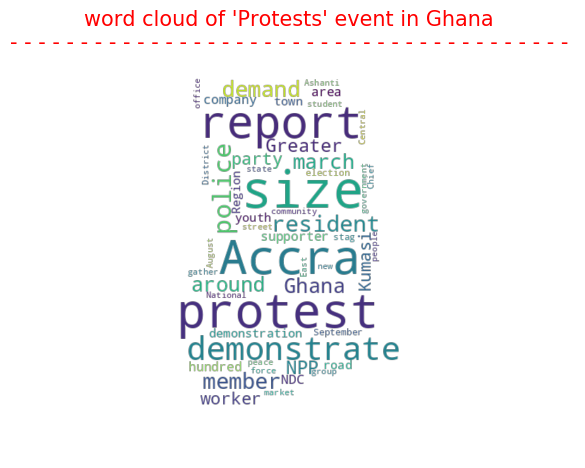

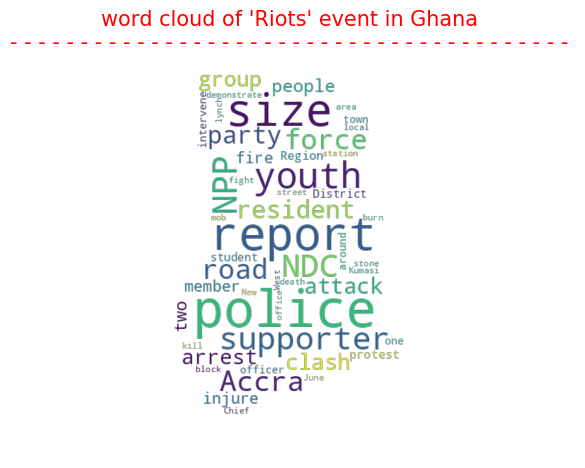

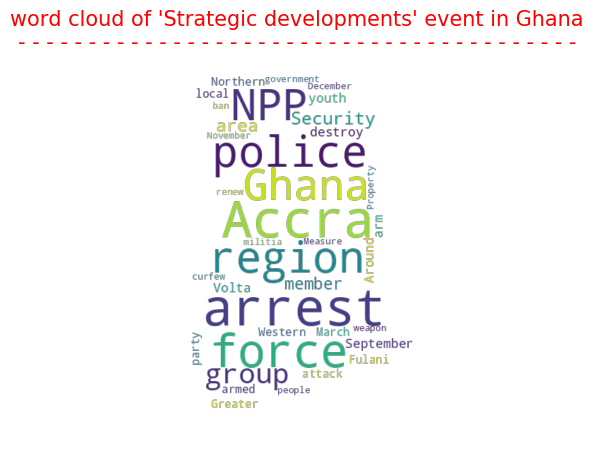

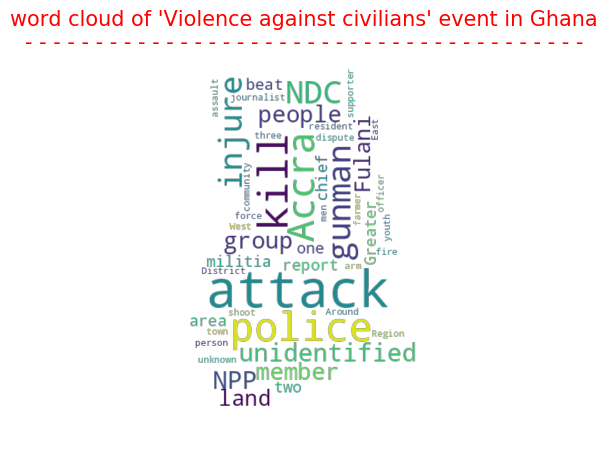

In [16]:
from PIL import Image
mask=np.array(Image.open("data/Ghana_map.png"))

for k in event_type_notes.keys():
    
    text=" ".join(event_type_notes[k])

    wc = WordCloud(width=900, height=500, mask=mask,
                   mode='RGBA', background_color=None,
                   min_font_size=12,max_font_size=72,
                   collocations=False,prefer_horizontal=0.8,
                   max_words=100).generate(text)

    # show wordcloud img
    plt.figure(figsize=(9,5),dpi=100)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("word cloud of '{}' event in Ghana \n{}".format(k,'- '*40),fontsize=15,color='red')
    plt.show()
    print()